##### Loan Application Status Prediction

##### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

##### Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [60]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])


No of Rows: 614
No. of Columns: 13


In [61]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
print(df.duplicated().sum())

0


##### There is no  duplicate value present !

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checking for missing values

<Axes: >

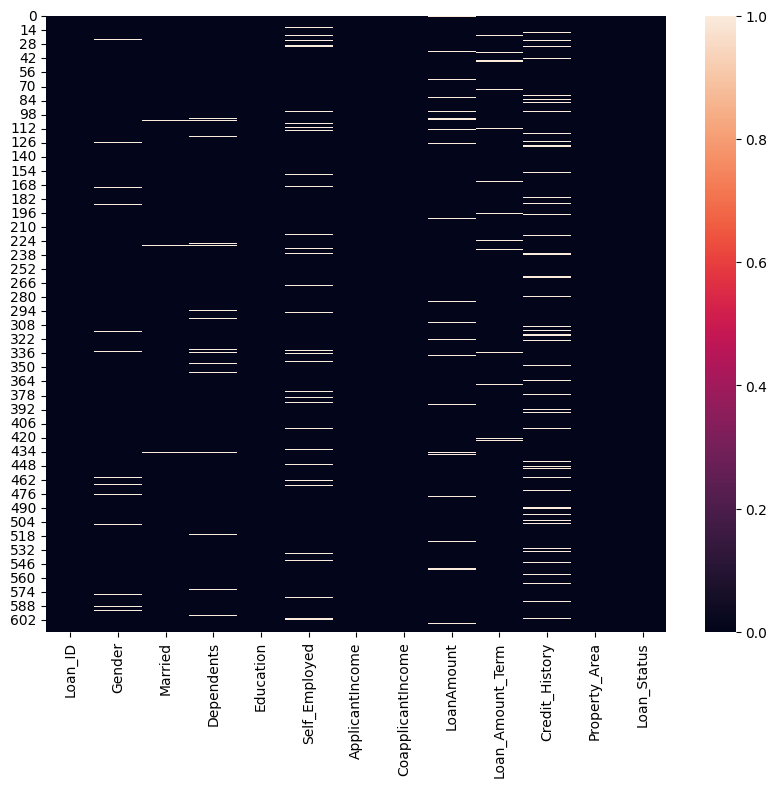

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [66]:
missingvalues=df.isnull().sum().sort_values(ascending=False)
percentage=(missingvalues/len(df))*100
print(pd.concat([missingvalues,percentage],axis=1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Education                       0        0.000000
Loan_ID                         0        0.000000
CoapplicantIncome               0        0.000000
ApplicantIncome                 0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


##### comment- 
- 7 out of 13 coulmns contain missing value.


In [67]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

In [68]:
for i in category:
    print(i)
    print(df[i].value_counts())
    print("----------------------------------------------")

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
----------------------------------------------
Married
Married
Yes    398
No     213
Name: count, dtype: int64
----------------------------------------------
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
----------------------------------------------
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
----------------------------------------------
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
----------------------------------------------
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
----------------------------------------------
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
-----------------------------------------

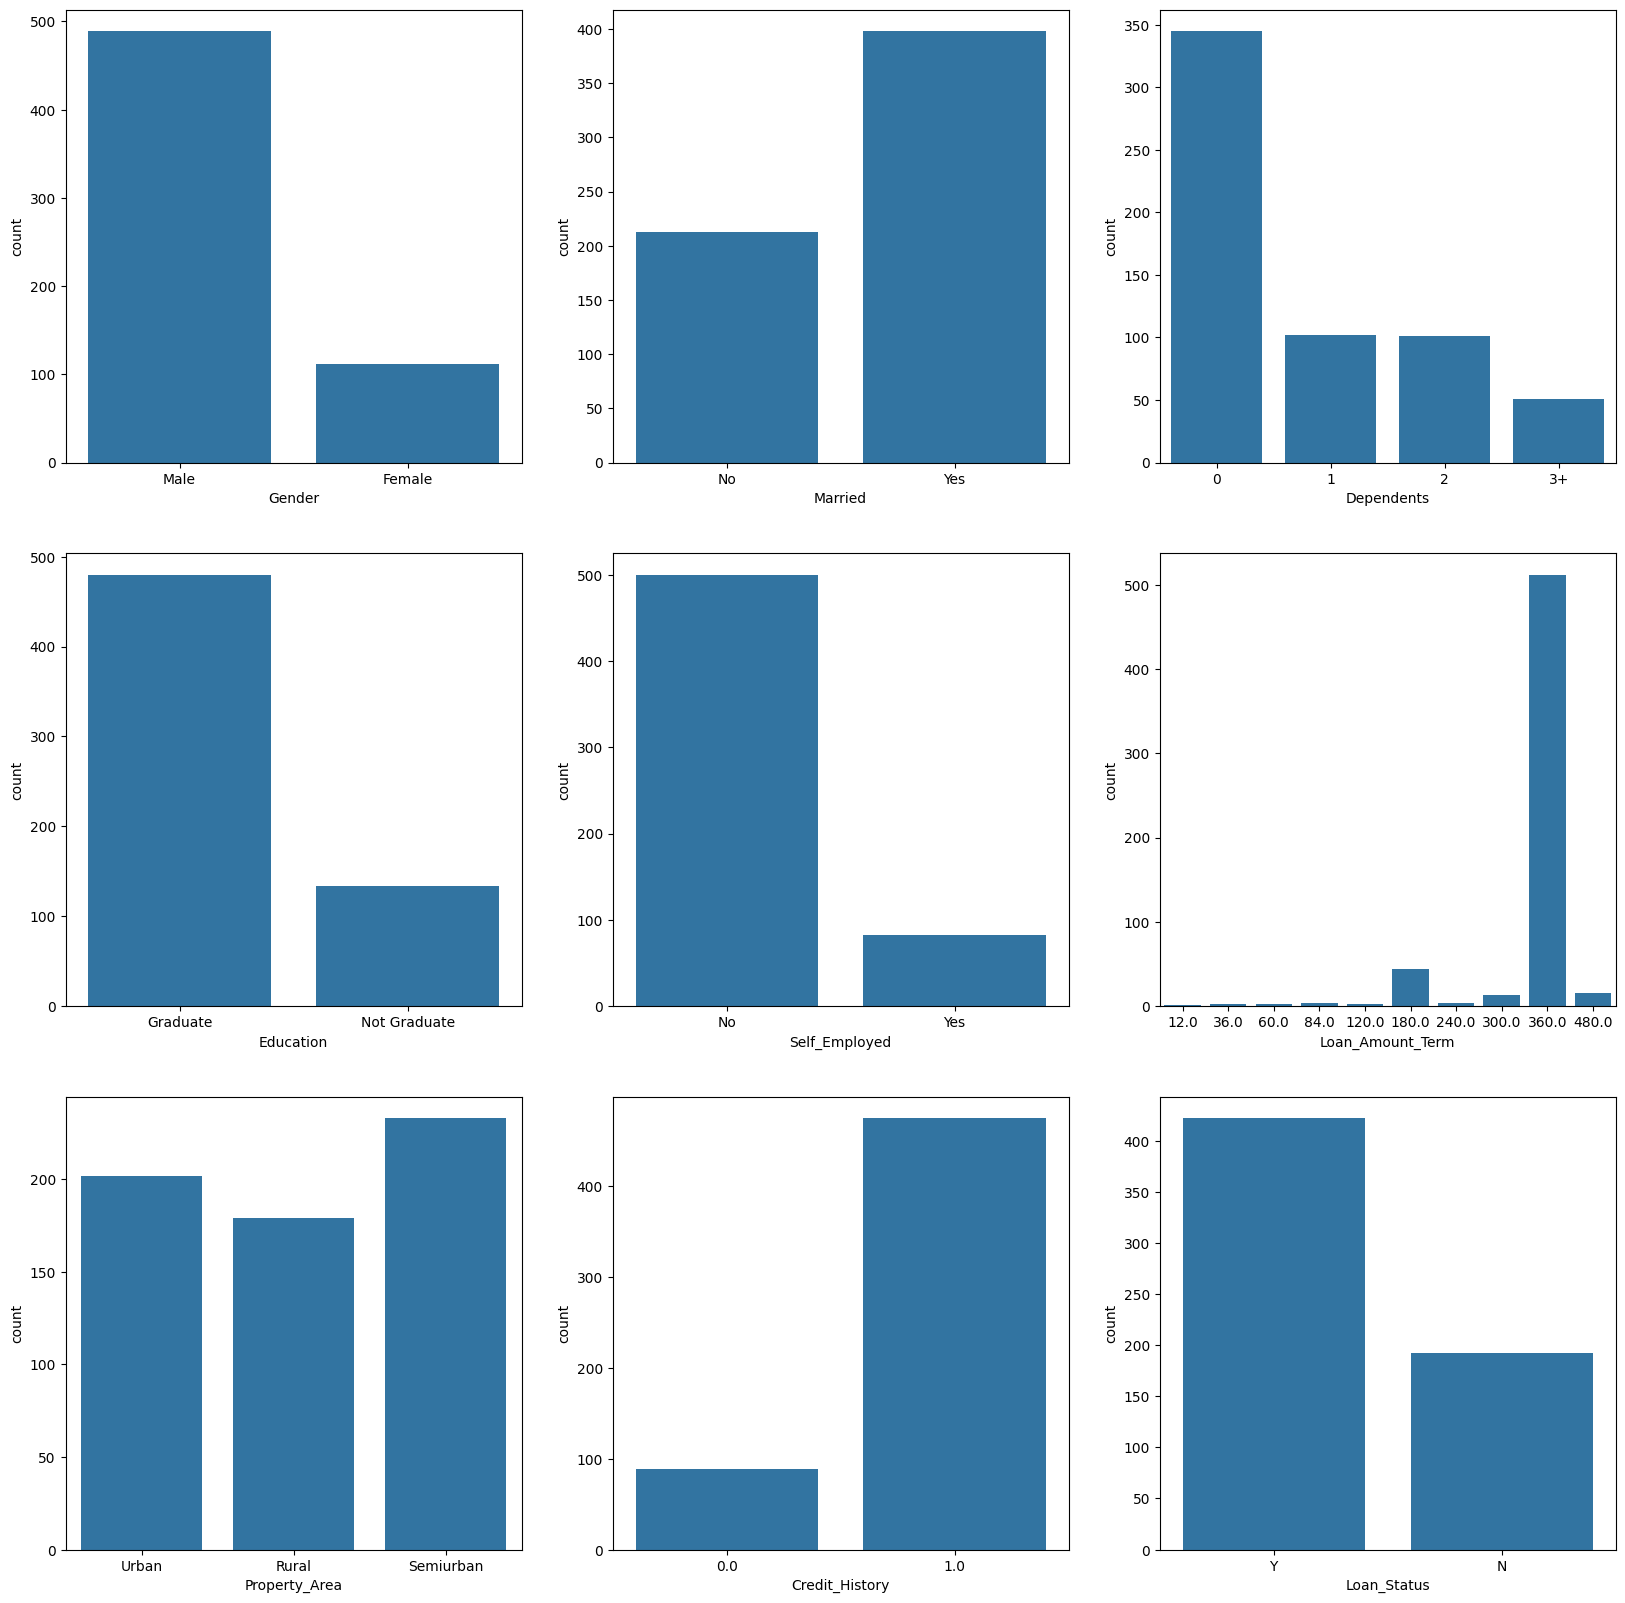

In [69]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

- Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?
- Only 20% applicants are self employed. So it will interesting to gain insight on relation between - - Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.
- Nearly 70% are married and 75% of loan applicants are graduates
- Almost 60% of the applicants have no dependents.
- Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
- 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
- Nearly 70 % applicant gets loan approved.

##### Credit_History, Self_Employed, LoanAmount, Dependents, Loan_Amount_Term, Gender, Married

###### These columns having null values lets replace NaN values with their respective column's mean.

In [70]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [71]:
missingvalues=df.isnull().sum().sort_values(ascending=False)
percentage=(missingvalues/len(df))*100
print(pd.concat([missingvalues,percentage],axis=1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


# EDA

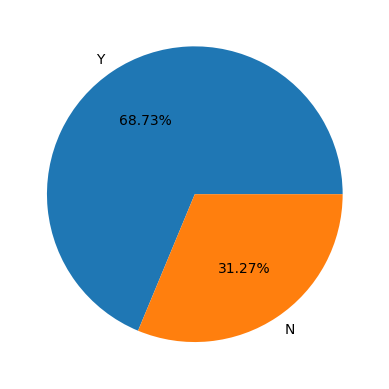

In [72]:
counts = df['Loan_Status'].value_counts()
plt.pie(counts,autopct='%2.2f%%',labels=counts.index)
plt.show()

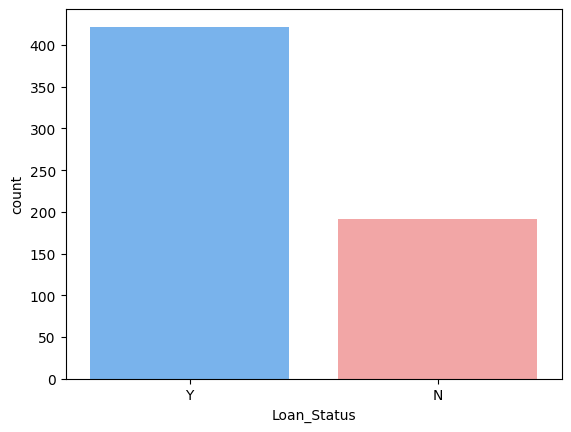

In [73]:
sns.countplot(x=df['Loan_Status'], palette={'Y': '#66b3ff', 'N': '#ff9999'})
plt.show()

##### Loan Status is our target variable in this dataframe - 
- 68.73% are YES
- 31.27% are NO

## Gender VS Loan Status

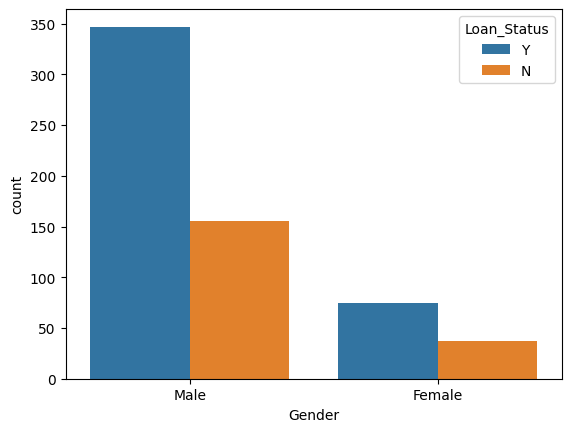

In [74]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])
plt.show()

In [75]:
pd.crosstab(df['Gender'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


###### 81.8% Applicant are male.
###### It means that gender doesnot play any role loan approval as both genders having approx nearby loan approvals.

## Married vs Loan Status

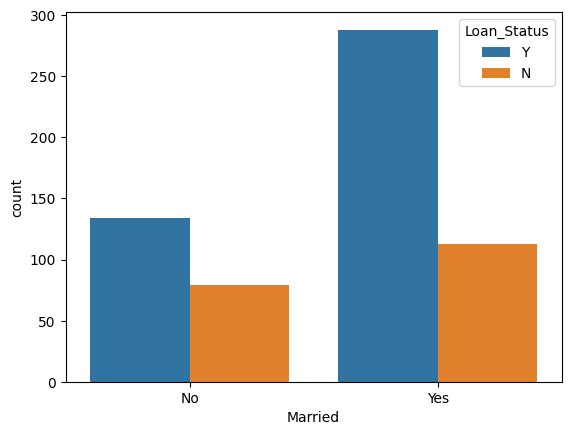

In [76]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])
plt.show()

- 65.3 % loan applicants are married. We can see from Count plot that Married people have more possibility of getting loan approval.

## Dependents on Loan Status

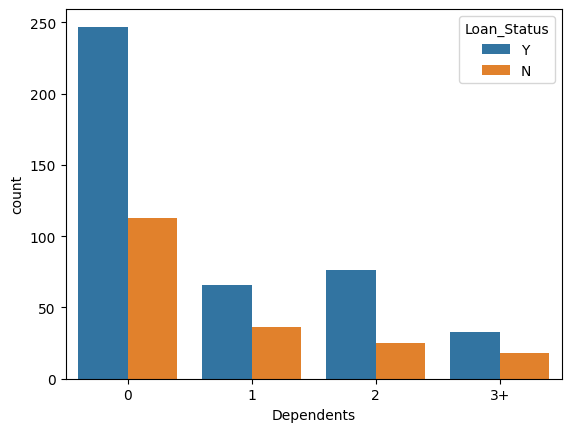

In [77]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])
plt.show()

In [78]:
pd.crosstab([df['Dependents'],df['Gender']],[df['Loan_Status']],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

#### Comment:
- 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. It will interesting check whether with increase in number dependents their is increase in requirement loan amount.
- Female having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

## Education vs Loan Status

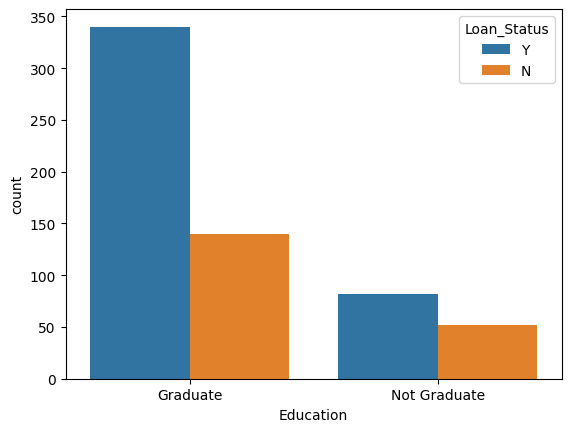

In [79]:
sns.countplot(x=df['Education'],hue=df['Loan_Status'])
plt.show()

In [80]:
pd.crosstab(df['Education'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


##### Graduate applicants are more likely to get loan approval irrespective gender.

# Encoding Catagorical data

In [81]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in category:
    df[i]=le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1,2,1


# Outlier Detection and Removal

In [83]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

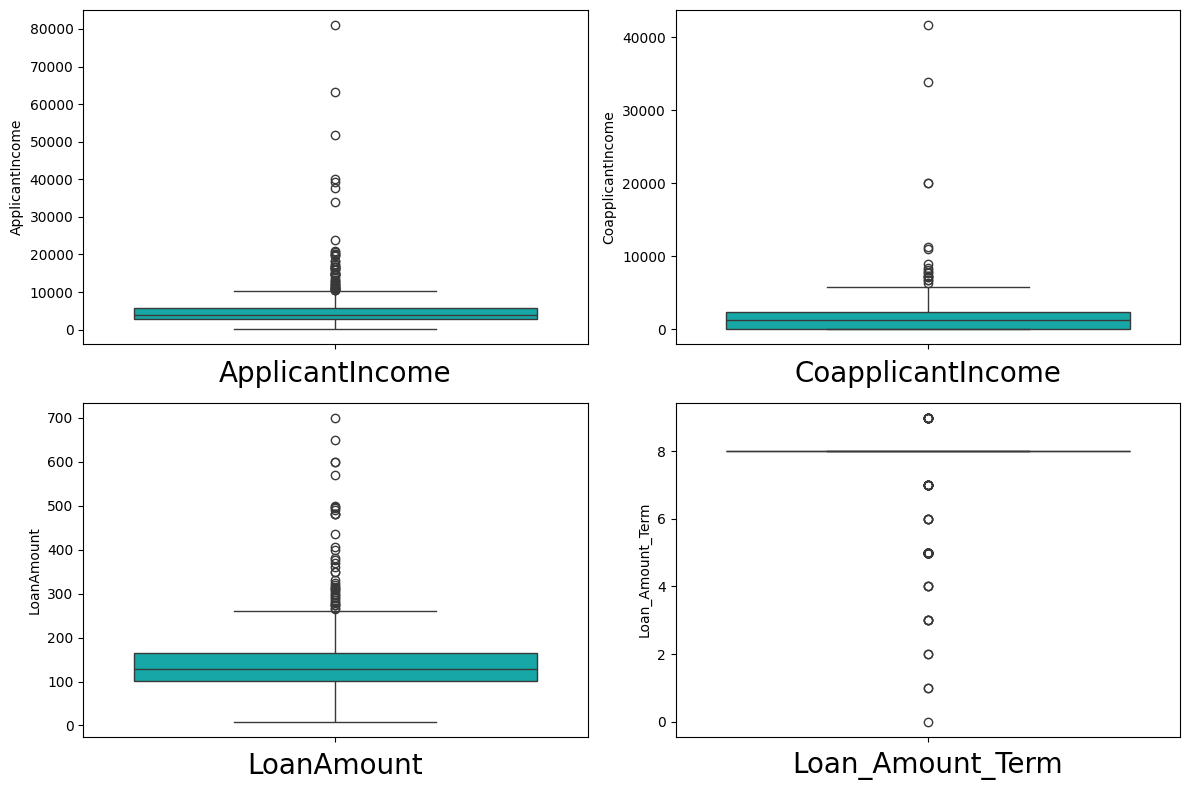

In [84]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [85]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [86]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [88]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,8,1,2,1


In [89]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 57.7 KB


## Skewness

In [91]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

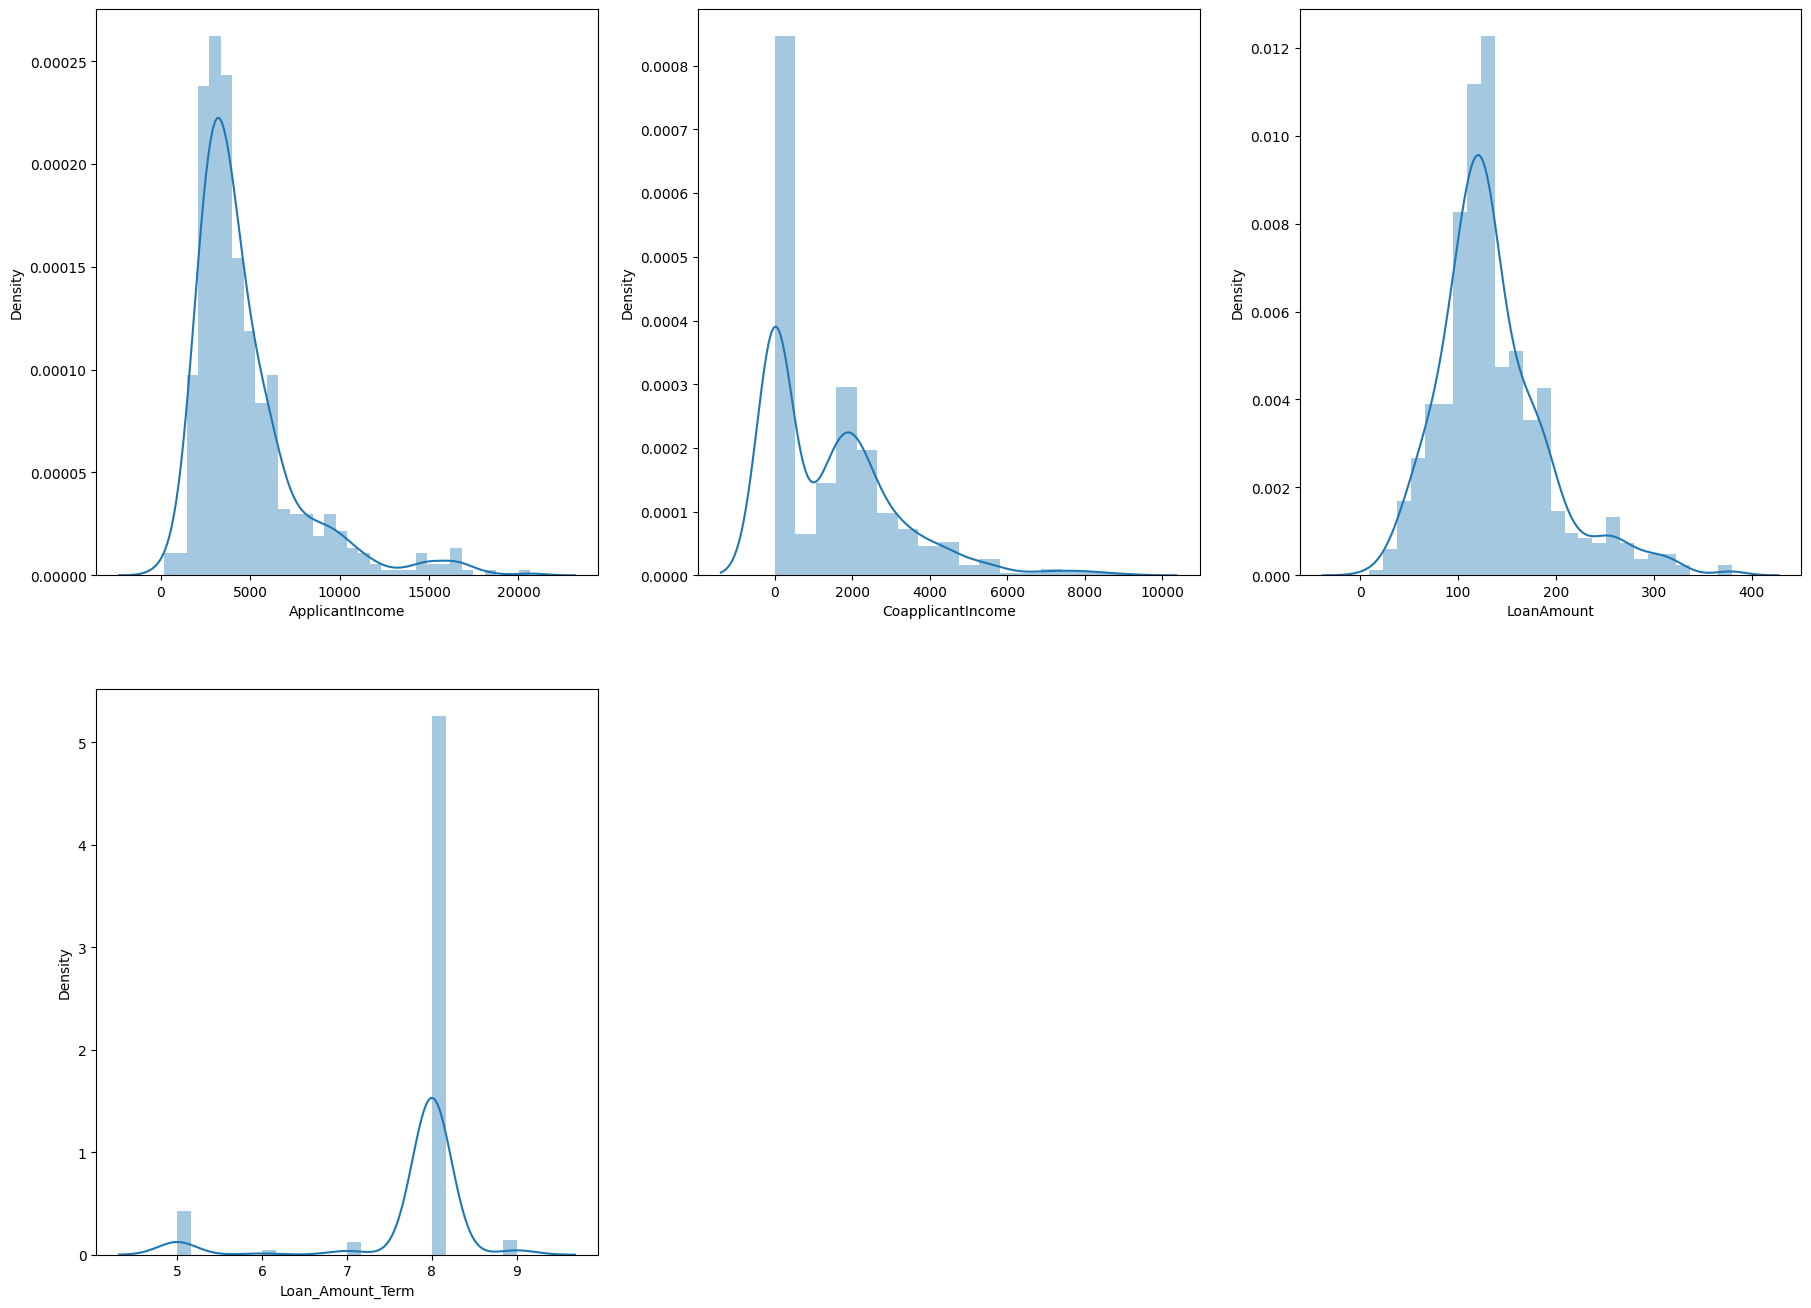

In [92]:
plt.figure(figsize=(22,25))
plotnumber=1
for i in Numerical:
    if plotnumber<=4:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df1[i])
    plotnumber+=1
plt.show()

In [93]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [94]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')


In [95]:
df1[skew]=scaler.fit_transform(df1[skew].values)
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

##### Skewness is Acceptable !

## Correlation

In [96]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.103679,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.121261,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.088274,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.100207,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.023570,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.056331,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.001821,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.060734,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.103679,-0.121261,-0.088274,-0.100207,-0.023570,-0.056331,0.001821,0.060734,1.000000,0.040500,-0.067388,-0.000088
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.040500,1.000000,-0.008121,0.560936


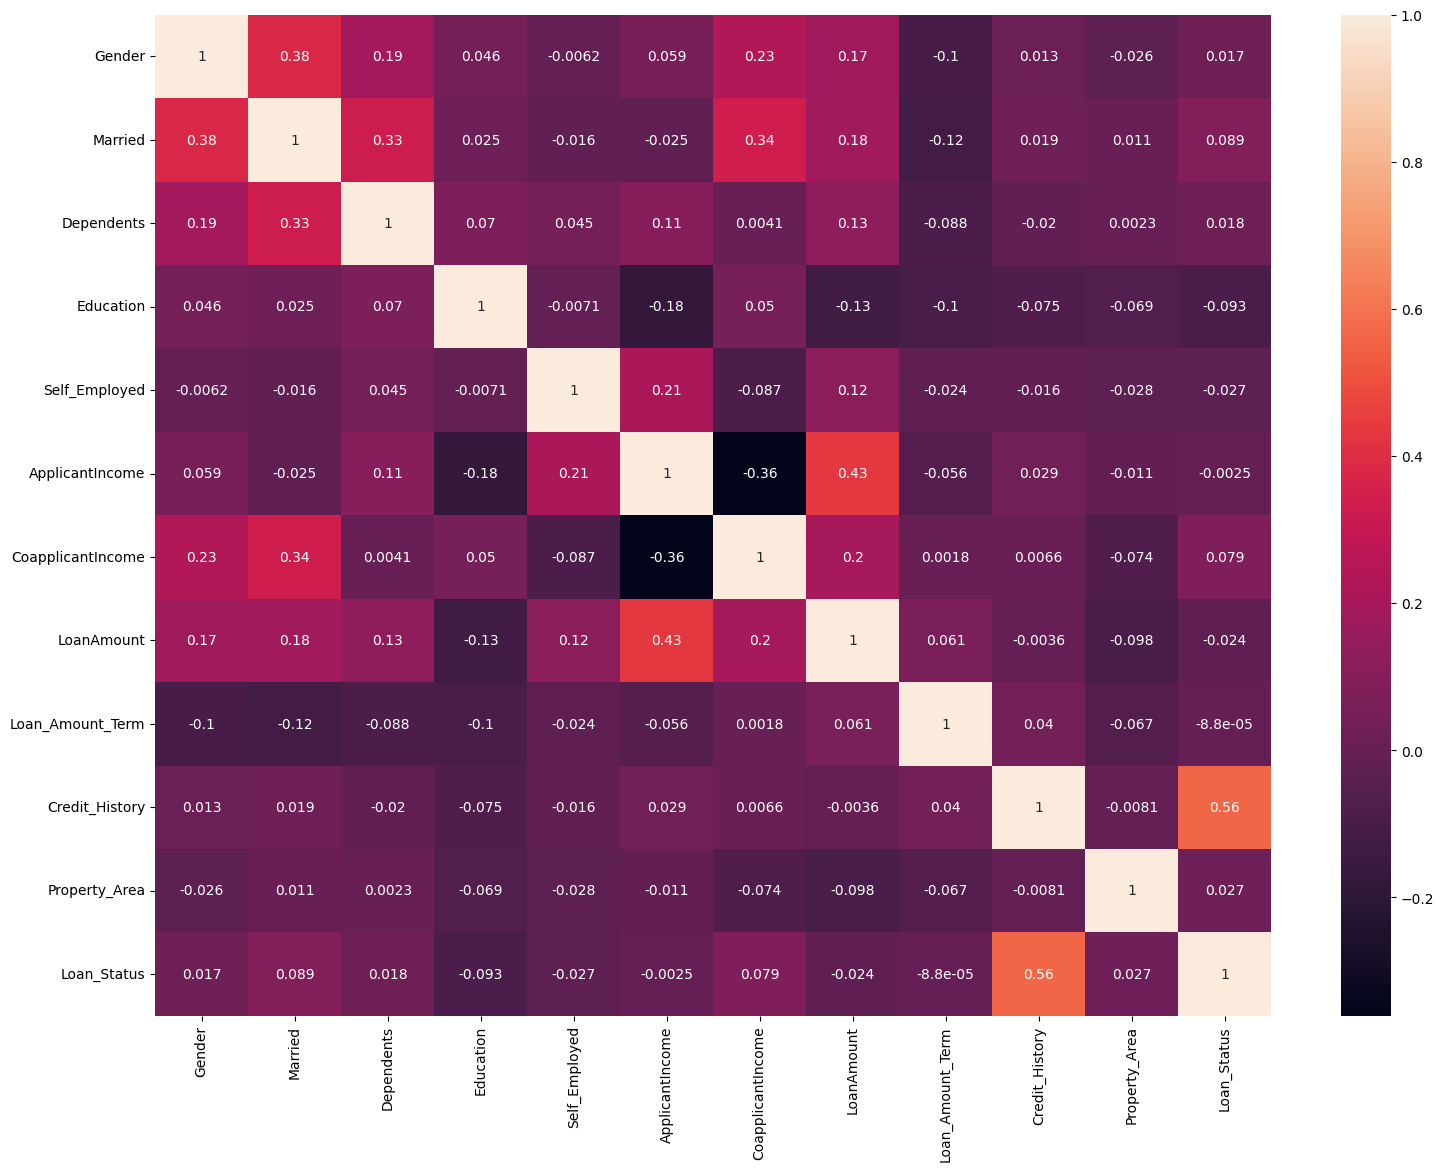

In [97]:
plt.figure(figsize=(18,13))
sns.heatmap(df1.corr(),annot=True)
plt.show()

-  Maximum correlation of 0.561 exist between Credit History and Loan status.

 ## Checking Multicollinearity between features using variance_inflation_factor

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,6.277753,Gender
1,3.982152,Married
2,1.778562,Dependents
3,1.361079,Education
4,1.200339,Self_Employed
5,1.751877,ApplicantIncome
6,1.599463,CoapplicantIncome
7,1.546596,LoanAmount
8,11.914172,Loan_Amount_Term
9,9.685083,Credit_History


#### All features VIF is within permissible limit of 10. 

##### So No Need to Worry About Multicollinearity.


In [99]:
X = df1.drop(['Loan_Status'], axis =1)
Y = df1['Loan_Status']

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

##### Now the target is balanced so that the model will not be biased.

In [102]:
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


In [106]:
# Logistic Regression
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)

In [107]:
print("Accuracy Score : ",accuracy_score(Y_test,y_pred))
print("Confusion Matrix : ",confusion_matrix(Y_test,y_pred))
print("Classification Report :\n ",classification_report(Y_test,y_pred))

Accuracy Score :  0.7866108786610879
Confusion Matrix :  [[ 69  41]
 [ 10 119]]
Classification Report :
                precision    recall  f1-score   support

           0       0.87      0.63      0.73       110
           1       0.74      0.92      0.82       129

    accuracy                           0.79       239
   macro avg       0.81      0.77      0.78       239
weighted avg       0.80      0.79      0.78       239



In [108]:
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
  



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7907949790794979


Confusion matrix : 
 [[ 81  29]
 [ 21 108]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       110
           1       0.79      0.84      0.81       129

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7531380753138075


Confusion matrix : 
 [[ 66  44]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.60      0.69       110
           1       0.72      0.88      0.79       129

    accuracy                           0.75       239
   macro avg       0.77      0.74      0.74       239
weighted avg       0.76      0.75      0.75       239




# Cross-Validation

In [109]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.66875    0.74213836 0.73584906 0.74213836 0.77358491]
Mean Score : 0.7324921383647799
Std deviation : 0.034493605191370444




Cross Validation Score SVC() :

Score : [0.70625    0.71698113 0.79245283 0.77358491 0.79245283]
Mean Score : 0.7563443396226417
Std deviation : 0.03731966846006789




Cross Validation Score GaussianNB() :

Score : [0.6875     0.71069182 0.7672956  0.75471698 0.76100629]
Mean Score : 0.7362421383647798
Std deviation : 0.03145636638953236




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69375    0.75471698 0.71069182 0.7672956  0.71069182]
Mean Score : 0.7274292452830189
Std deviation : 0.02838492796391764




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.6625     0.72955975 0.74213836 0.73584906 0.79245283]
Mean Score : 0.7324999999999999
Std deviation : 0.0414900016454721




Cross Validation Score RandomForestClassifier() :

Score : [0.7375     0.80503145 

# Hyper Parameter Tuning : GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [112]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [113]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50}

In [115]:
Final_mod = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators=60, max_depth=50, max_features='sqrt')
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8326359832635983


In [116]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']